## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading Dataset

In [2]:
df = pd.read_csv("data/train.csv")

## 3. Analyzing dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Handling Missing Values

In [6]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### As we can see, Age column have '177' null values and cabin have '687' null values and embarked with '2'

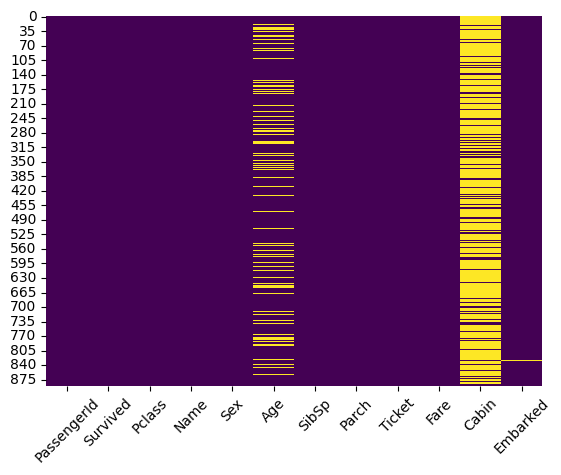

In [7]:
# Visualizing missing values

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Imputing missing values

df['Age'] = df['Age'].fillna(df['Age'].median()) #Filling missing Age with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #Filling missing Embarked with mode

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## 4. Cleaning Dataset

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

## 4. Univariate Analysis (Single Column)

##### For each column, I will look at it's basic stats, distribution and visualization.

### Numeric columns:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

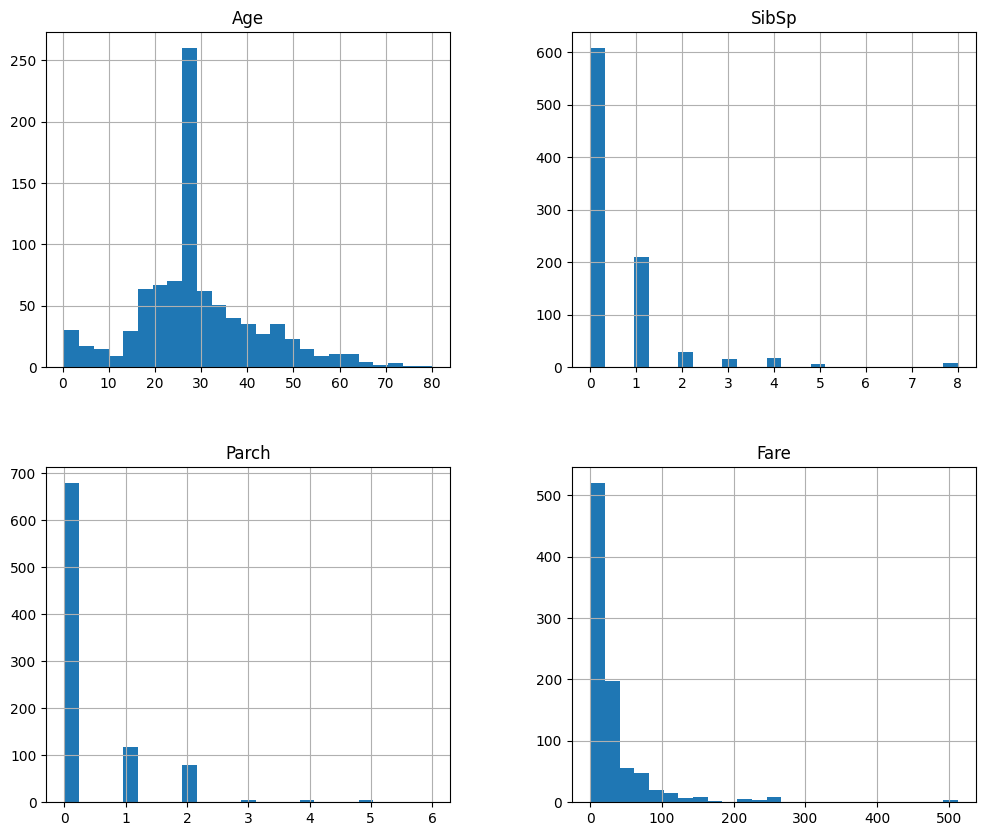

In [12]:
# Plotting Histogram
num_cols = df[['Age','SibSp','Parch','Fare']]
num_cols.hist(bins=25,figsize=(12,10))

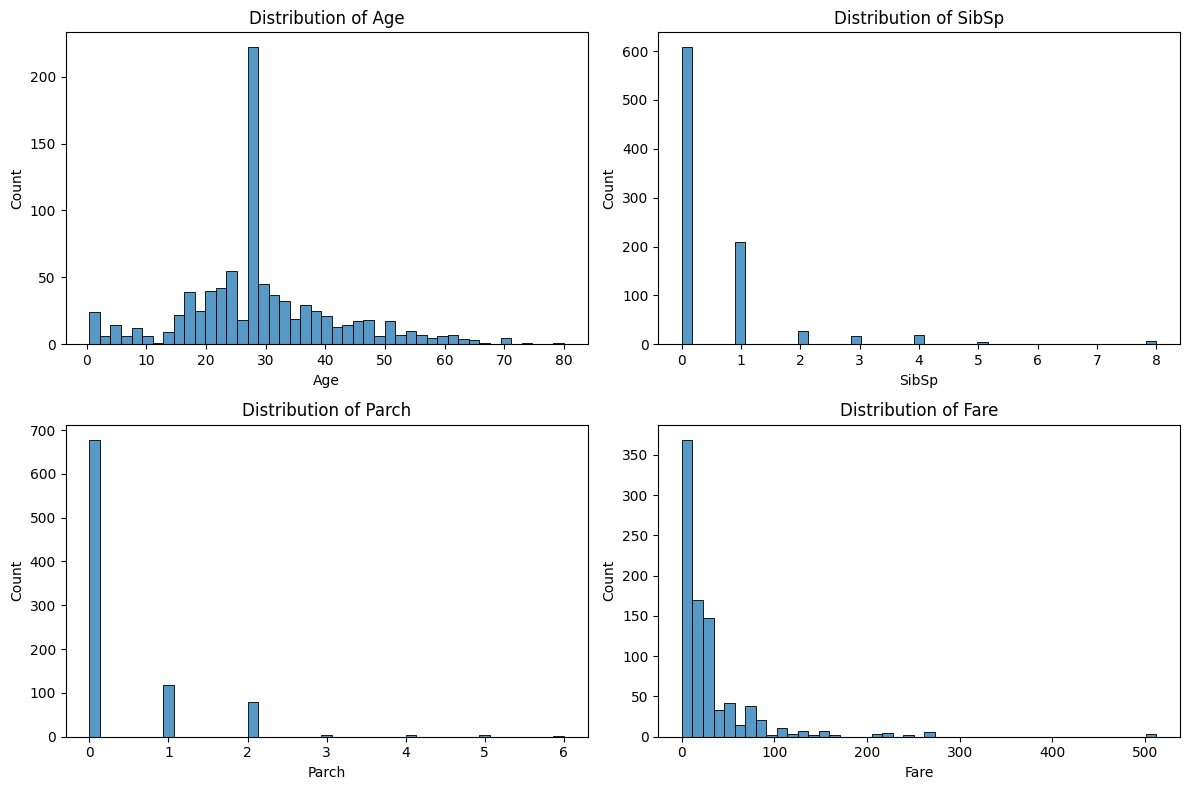

In [13]:
plt.figure(figsize=(12,8))

for i,col in enumerate(num_cols.columns,1):
    plt.subplot(2,2,i)
    sns.histplot(df[col],bins=45,kde=False)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

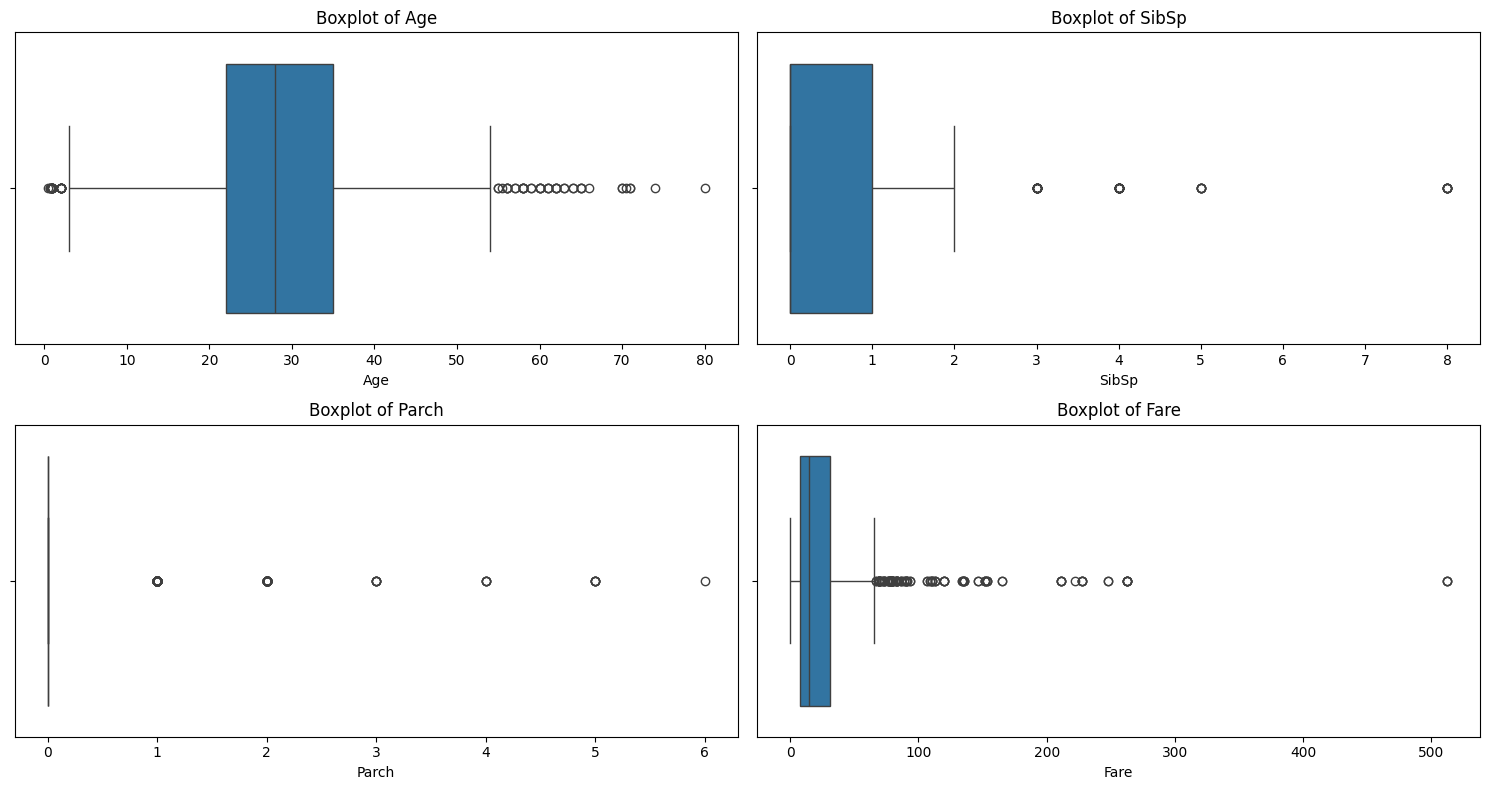

In [14]:
# Box plot
plt.figure(figsize=(15,8))

for i,col in enumerate(num_cols.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

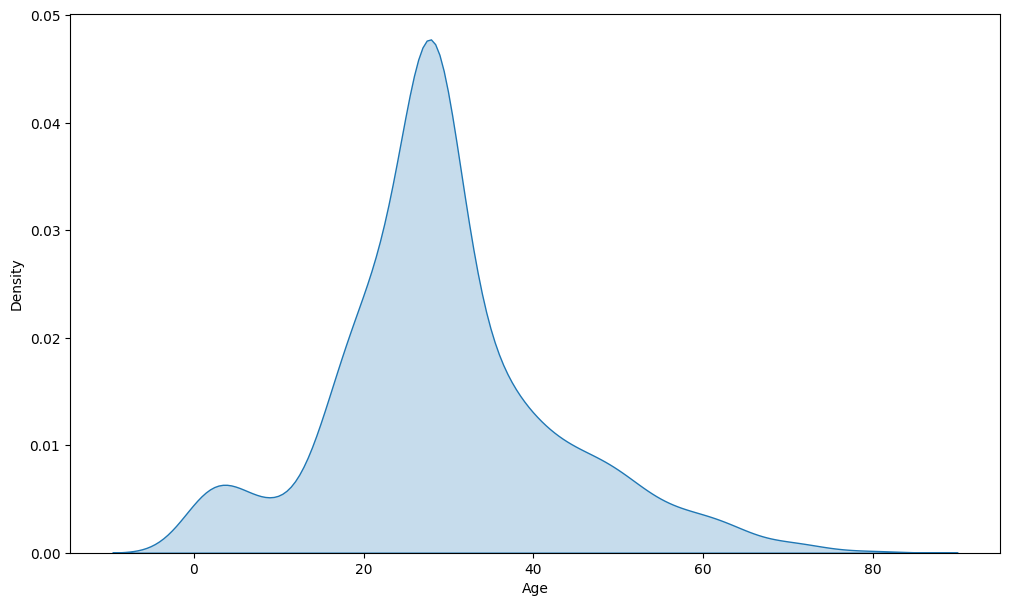

In [15]:
# kde plot for Age
plt.figure(figsize=(12,7))
sns.kdeplot(df['Age'],fill=True)

### Categorical columns:

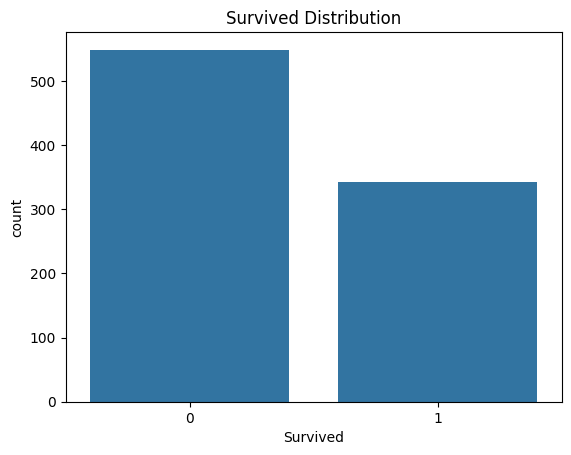

In [17]:
# Survived Countplot
sns.countplot(x='Survived', data=df)
plt.title('Survived Distribution')
plt.show()

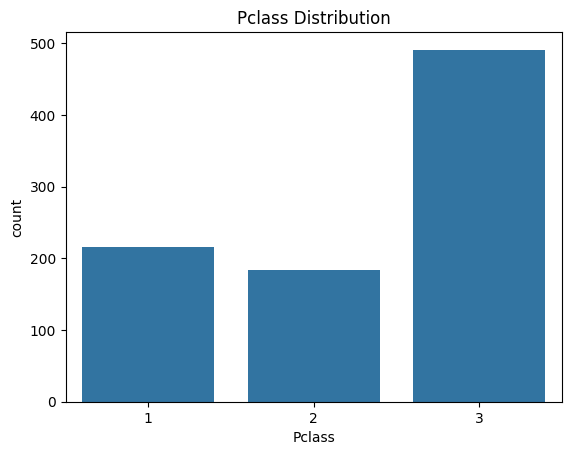

In [18]:
# Pclass Countplot

sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')
plt.show()

1 = Survived   , 0 = Not Survived

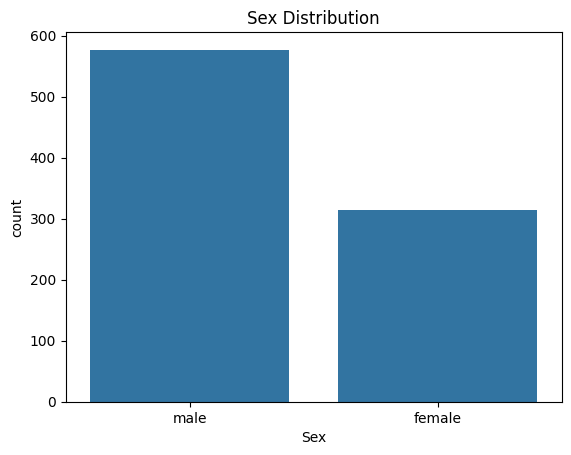

In [19]:
# Sex Countplot

sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()

1 = Survived   , 0 = Not Survived

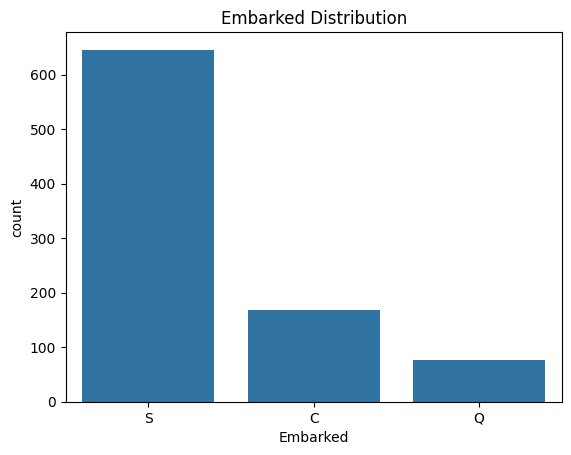

In [20]:
# Embarked Countplot

sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.show()

1 = Survived   , 0 = Not Survived

## 5. Bivariate Analysis (Two Columns)

##### In this section, I will examine relationships between pairs of columns.

### Numerical vs Numerical

Text(0.5, 1.0, 'Age vs Fare Survival')

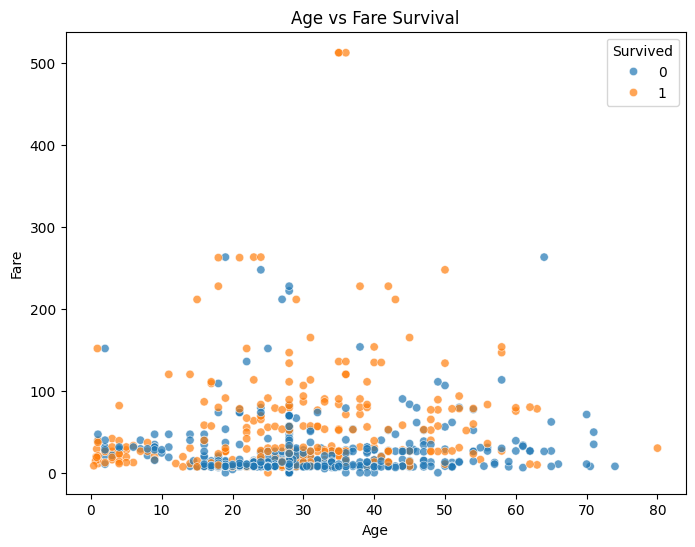

In [21]:
#(Age vs Fare)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare',alpha=0.7,hue='Survived')
plt.title('Age vs Fare Survival')

1 = Survived   , 0 = Not Survived

Text(0.5, 1.0, 'Age vs Fare Gender')

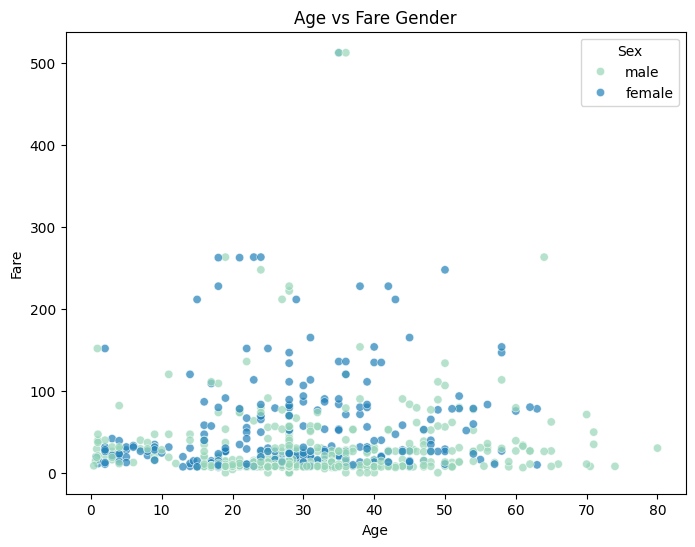

In [22]:
#(Age vs Fare)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare',alpha=0.7,hue='Sex',palette='YlGnBu')
plt.title('Age vs Fare Gender')

<Axes: xlabel='SibSp', ylabel='Parch'>

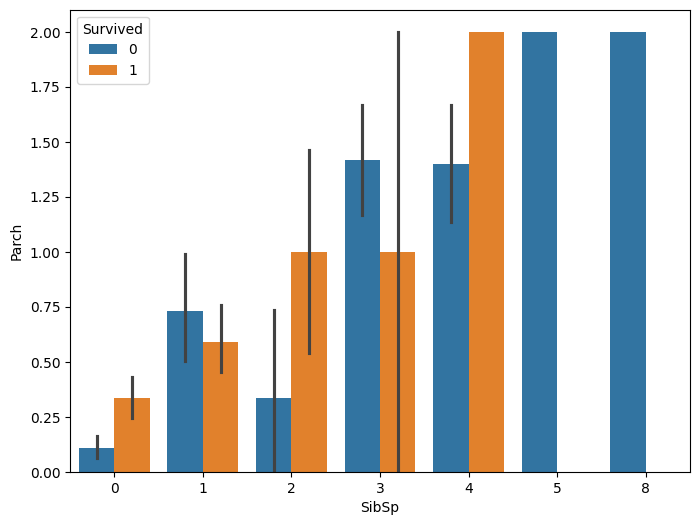

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x='SibSp',y='Parch',hue='Survived')

0 = Not Survived   , 1 = Survived

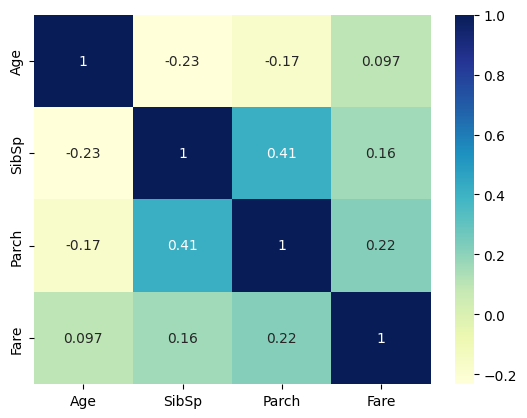

In [24]:
# Correlation heatmap for numerical columns
corr_matrix = df[['Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

### Categorical vs Numerical

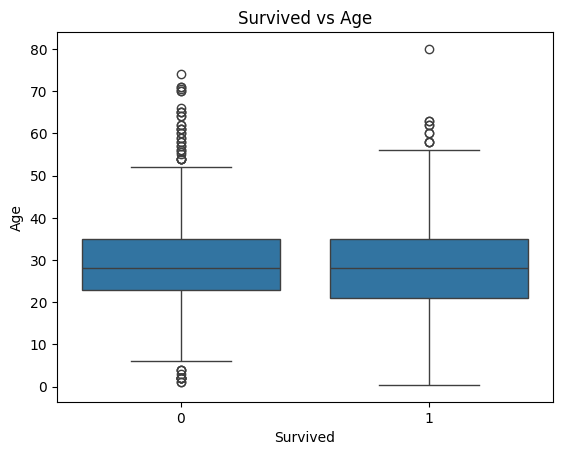

In [25]:
# Boxplot for Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survived vs Age')
plt.show()

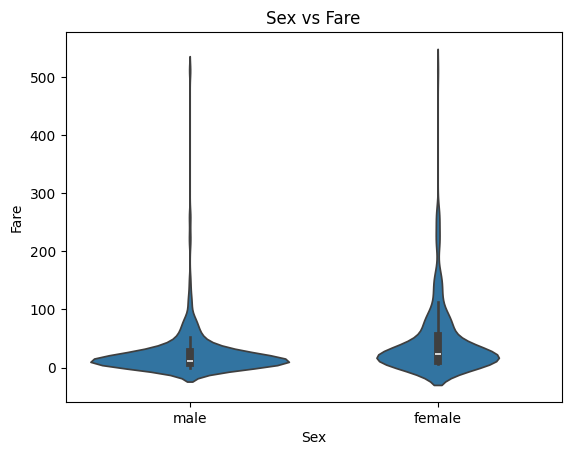

In [26]:
# Violin plot for Sex vs Fare
sns.violinplot(x='Sex',y='Fare',data=df)
plt.title('Sex vs Fare')
plt.show()

### Categorical vs Categorical

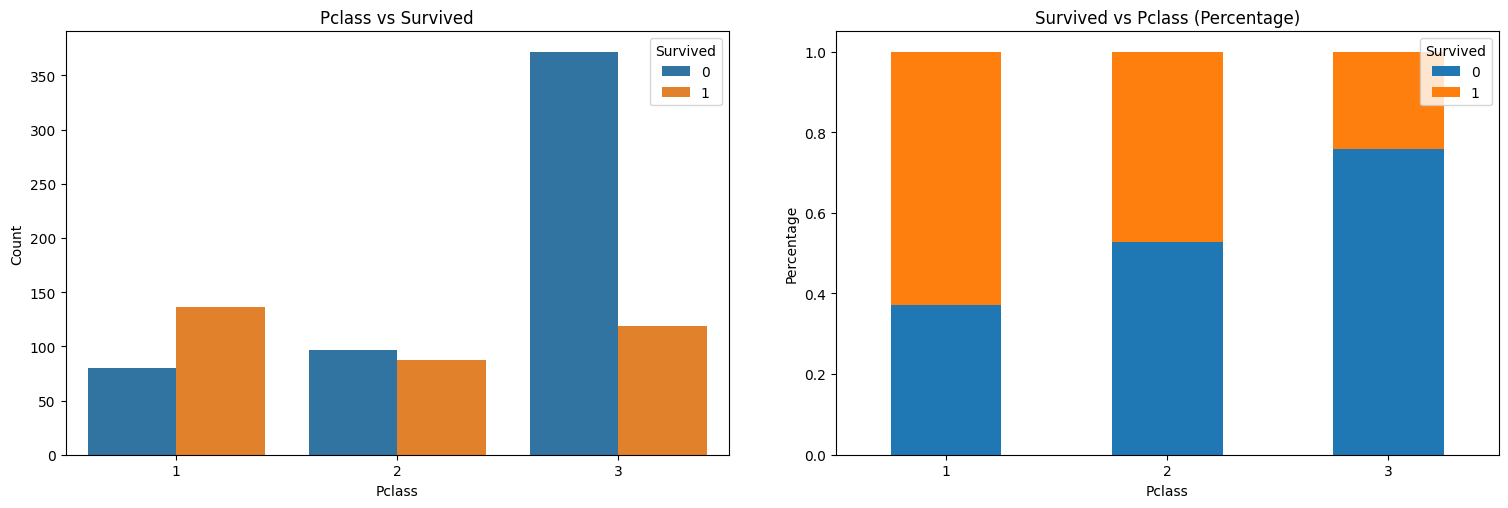

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: countplot
sns.countplot(x='Pclass', data=df, hue='Survived', ax=axes[0])
axes[0].set_title('Pclass vs Survived')
axes[0].set_ylabel('Count')

# Second plot: normalized stacked bar
survived_pclass = pd.crosstab(df['Pclass'], df['Survived'], normalize='index')
survived_pclass.plot(kind='bar', stacked=True, ax=axes[1], legend=True)
axes[1].set_title('Survived vs Pclass (Percentage)')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(survived_pclass.index.astype(str), rotation=0)
axes[1].legend(title='Survived', loc='upper right')

plt.tight_layout(pad=4)
plt.show()


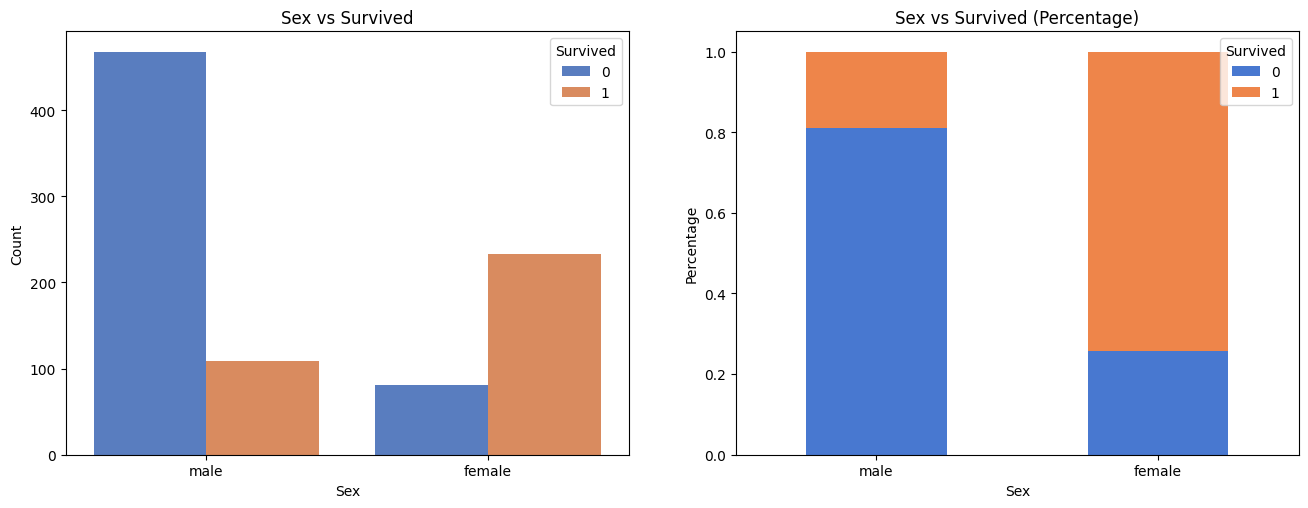

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Countplot
sns.countplot(x='Sex', data=df, hue='Survived', palette='muted', ax=axes[0])
axes[0].set_title('Sex vs Survived')
axes[0].set_ylabel('Count')

# Second plot: Normalized stacked bar
survived_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
survived_sex = survived_sex.reindex(['male', 'female'])  # reorder sexes

# Use same palette colors from seaborn
sex_colors = sns.color_palette('muted')[:len(survived_sex.columns)]
survived_sex.plot(kind='bar', stacked=True, ax=axes[1], color=sex_colors)

axes[1].set_title('Sex vs Survived (Percentage)')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(survived_sex.index.astype(str), rotation=0)
axes[1].legend(title='Survived', loc='upper right')

plt.tight_layout(pad=4)
plt.show()


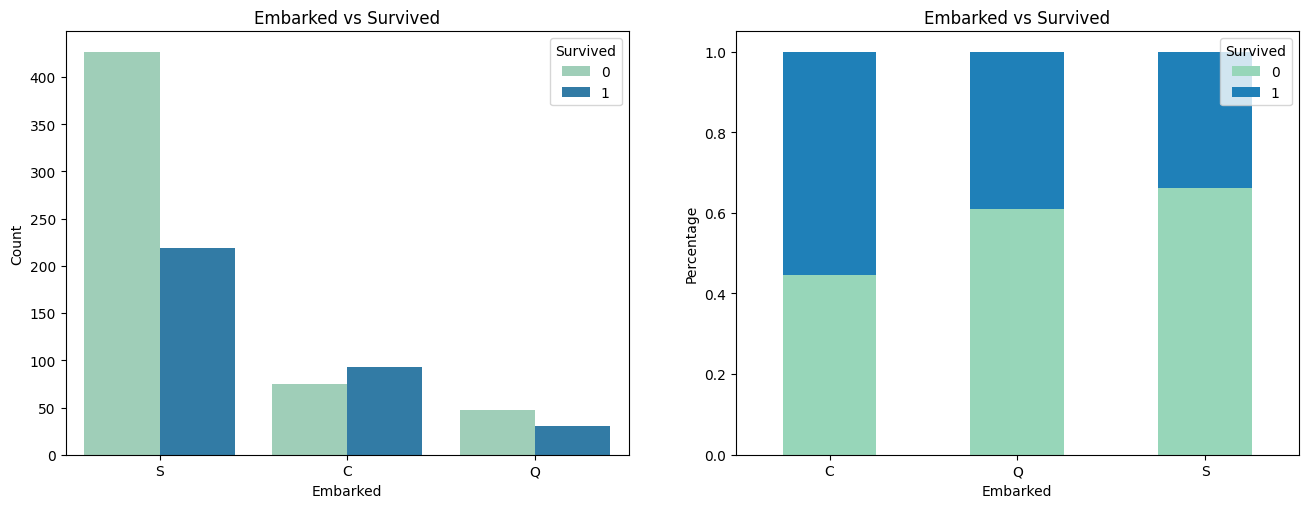

In [29]:
fig, axes = plt.subplots(1,2,figsize=(14,6))

# First plot: Countplot
sns.countplot(data=df, x='Embarked', hue='Survived', palette='YlGnBu', ax=axes[0])
axes[0].set_title('Embarked vs Survived')
axes[0].set_ylabel('Count')

# Second plot: Normalized stacked bar
survived_emb = pd.crosstab(df['Embarked'], df['Survived'], normalize='index')

# Use same palette colours from seaborn
emb_colors = sns.color_palette('YlGnBu', n_colors=len(survived_emb.columns))
survived_emb.plot(kind='bar', stacked=True, color=emb_colors, ax=axes[1])

axes[1].set_title('Embarked vs Survived')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(survived_emb.index.astype(str), rotation=0)

plt.tight_layout(pad=4)
plt.show()

## 6. Multivariate Analysis (Multiple Columns)

##### Now, I’ll explore more than two variables to look at complex relationships.

#### Pairplot

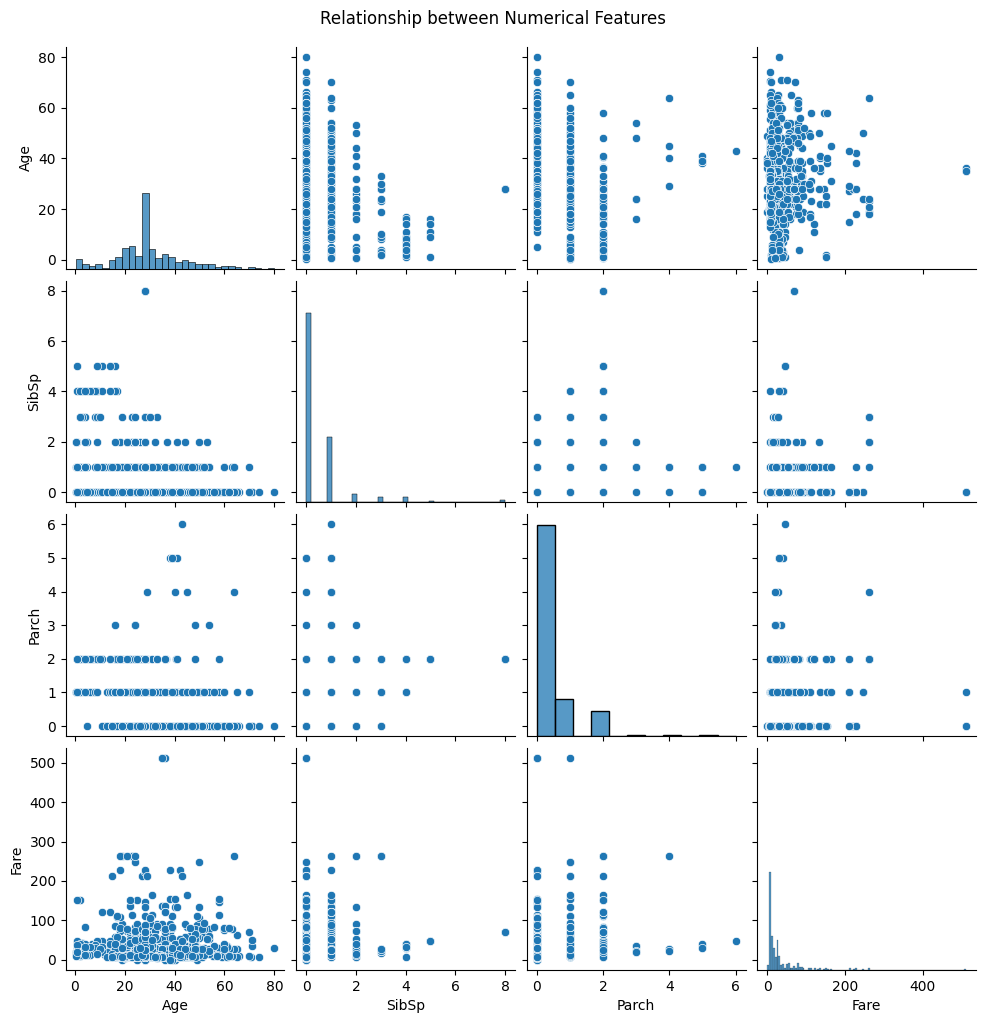

In [30]:
# Pairplot to visualize relationships between numerical features
pair = sns.pairplot(df[['Age','SibSp','Parch','Fare']])
pair.fig.suptitle('Relationship between Numerical Features', y=1.02)
plt.show()

#### Facet Grid

d:\Languages\GitHub\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


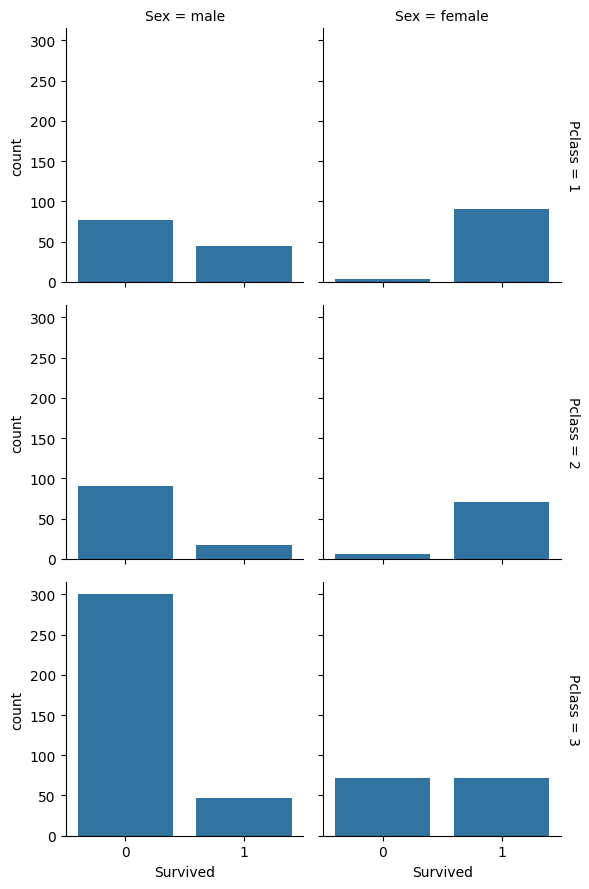

In [31]:
# FacetGrid for 'Pclass' and 'Survived' across 'Sex'
g = sns.FacetGrid(df, col='Sex', row='Pclass', margin_titles=True)
g.map(sns.countplot, 'Survived')
plt.show()

## 7. Final Insights & Summary

In [ ]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [43]:
# Basic summary insights
print(f"Average Age: {df['Age'].mean()}")
print(f"Survival Rate: {df['Survived'].mean() * 100:.2f}%")
print(f"Most Common Embarked: {df['Embarked'].mode()[0]}")

# Correlation insights
correlations = df.select_dtypes(include='number').corr()['Survived'].drop('Survived')
print("Most correlated features with Survival:\n" + str(round(correlations.abs().sort_values(ascending=False), 2)))
print("Highest Positive correlated feature with Survival: " + correlations.idxmax())

Average Age: 29.36158249158249
Survival Rate: 38.38%
Most Common Embarked: S
Most correlated features with Survival:
Sex       0.54
Pclass    0.34
Fare      0.26
Parch     0.08
Age       0.06
SibSp     0.04
Name: Survived, dtype: float64
Highest Positive correlated feature with Survival: Fare
